In [1]:
import numpy
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy
sympy.init_printing()

import sys
sys.path.append("/home/ex/Documents/Hons/CBT/Skogestad-Python")
import utils

In [2]:
s = sympy.Symbol('s')

In [47]:
def G(s):
    return numpy.array([[4.05 * numpy.exp(-27*s) / (50*s + 1),
                         1.77 * numpy.exp(-28*s) / (60*s + 1),
                         5.88 * numpy.exp(-27*s) / (50*s + 1)],
                        [5.39 * numpy.exp(-18*s) / (50*s + 1),
                         5.72 * numpy.exp(-14*s) / (60*s + 1),
                         6.90 * numpy.exp(-15*s) / (40*s + 1)],
                        [4.38 * numpy.exp(-20*s) / (33*s + 1),
                         4.42 * numpy.exp(-22*s) / (44*s + 1),
                         7.20 * numpy.exp(-0*s) / (19*s + 1)]])

def compensator(s):
    return numpy.matrix([
[ (0.7758*s**4 + 0.2897*s**3 + 0.6933*s**2 + 0.2112*s + 0.8522)/(0.3698*s**4 + 0.7059*s**3 + 0.7068*s**2 + 0.1573*s + 0.849), (0.6347*s**4 + 0.92*s**3 + 0.9788*s**2 + 0.1182*s + 0.2724)/(0.4146*s**4 + 0.4356*s**3 + 0.7927*s**2 + 0.0507*s + 0.6826),     (0.246*s**4 + 0.1986*s**3 + 0.918*s**2 + 0.2371*s + 0.7241)/(1.1449*s**4 + 0.56*s**3 + 0.1516*s**2 + 0.0809*s + 0.5492)],
[(0.4154*s**4 + 0.4907*s**3 + 0.6919*s**2 + 0.7222*s + 0.6596)/(0.8712*s**4 + 0.3248*s**3 + 0.7562*s**2 + 0.1188*s + 0.7187), (0.143*s**4 + 0.9381*s**3 + 0.0363*s**2 + 0.5935*s + 0.3953)/(0.8651*s**4 + 0.1523*s**3 + 0.3149*s**2 + 0.2693*s + 0.429),    (0.2802*s**4 + 0.331*s**3 + 0.9575*s**2 + 0.2682*s + 0.1605)/(0.8115*s**4 + 0.804*s**3 + 0.8133*s**2 + 0.939*s + 0.4737)],
[ (0.7387*s**4 - 0.0239*s**3 + 0.262*s**2 + 0.3662*s + 0.8999)/(0.7673*s**4 + 0.0962*s**3 + 0.8871*s**2 + 0.3849*s + 1.0315),   (0.7456*s**4 + 0.3656*s**3 + 0.0758*s**2 + 0.5717*s + 0.69)/(0.2821*s**4 + 0.5967*s**3 + 0.0065*s**2 + 0.06*s + 0.5726), (1.0878*s**4 + 0.7457*s**3 + 0.4789*s**2 + 0.0271*s + 0.8954)/(0.5798*s**4 + 0.0496*s**3 + 0.1238*s**2 + 0.1125*s + 0.4841)]])

def K(s):
    Ks = numpy.array([0.13751435, 0.12516383, 0.02904858])
    tauis = numpy.array([77.242877658, 43.21218161 ,  47.2764907])/3
    return numpy.diag(Ks*(1 + 1/tauis/s)) 

In [48]:
def G(s):
    return numpy.array([[4.05 / (50*s + 1),
                         1.77 / (60*s + 1),
                         5.88 / (50*s + 1)],
                        [5.39 / (50*s + 1),
                         5.72 / (60*s + 1),
                         6.90 / (40*s + 1)],
                        [4.38 / (33*s + 1),
                         4.42 / (44*s + 1),
                         7.20 / (19*s + 1)]])

In [49]:
GK = sympy.Matrix(G(s)) * sympy.Matrix(K(s))
nums, dens = numpy.zeros(GK.shape).tolist(), numpy.zeros(GK.shape).tolist()
for i in range(GK.shape[0]):
    for j in range(GK.shape[1]):
        gk = GK[i, j]
        n, d = [sympy.Poly(a, s).all_coeffs() for a in gk.as_numer_denom()]
        nums[i][j] = n
        dens[i][j] = d
            
nums = numpy.array(nums)
dens = numpy.array(dens)
delays = [[27, 28, 27], [18, 14, 15], [20, 22, 0]]
nums, dens

(array([[[0.556933117500000, 0.0216304648811457],
         [0.221539979100000, 0.0153803837838679],
         [0.170805650400000, 0.0108387264708715]],
 
        [[0.741202346500000, 0.0287872112862655],
         [0.715937107600000, 0.0497038391207483],
         [0.200435202000000, 0.0127189137158186]],
 
        [[0.602312853000000, 0.0233929472047946],
         [0.553224128600000, 0.0384075120478510],
         [0.209149776000000, 0.0132719099643324]]], dtype=object),
 array([[[50, 1, 0],
         [60, 1, 0],
         [50, 1, 0]],
 
        [[50, 1, 0],
         [60, 1, 0],
         [40, 1, 0]],
 
        [[33, 1, 0],
         [44, 1, 0],
         [19, 1, 0]]], dtype=object))

In [50]:
## PI

In [51]:
L = utils.InternalDelay.from_tf_coefficients(nums, dens, delays)

Inum = [[[1], [0], [0]], [[0], [1], [0]], [[0], [0], [1]]]
Iden = [[[1], [1], [1]], [[1], [1], [1]], [[1], [1], [1]]]
Idelay = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

I = utils.InternalDelay.from_tf_coefficients(Inum, Iden, Idelay)

T = L * (I + L)**(-1)

def uf(t):
    if t < 2000:
        return [1, 0, 0]
    elif t < 4000:
        return [1, 1, 0]
    return [1, 1, 1]

ts = numpy.linspace(0, 6000, 6000)
ys = T.simulate(uf, ts)

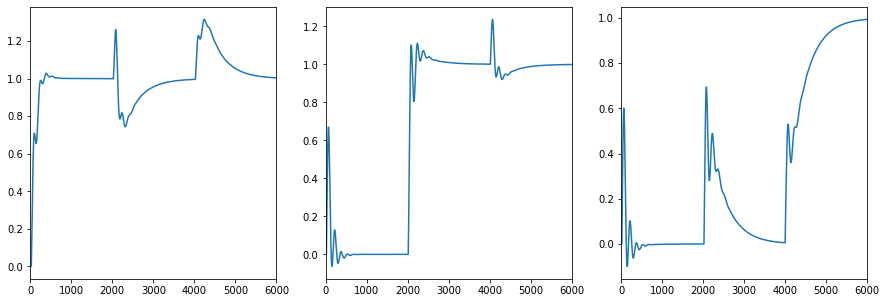

In [52]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(ts, ys[:, 0])
plt.xlim(0, ts[-1])

plt.subplot(1, 3, 2)
plt.plot(ts, ys[:, 1])
plt.xlim(0, ts[-1])

plt.subplot(1, 3, 3)
plt.plot(ts, ys[:, 2])
plt.xlim(0, ts[-1])
plt.savefig("resp.pdf")
plt.show()

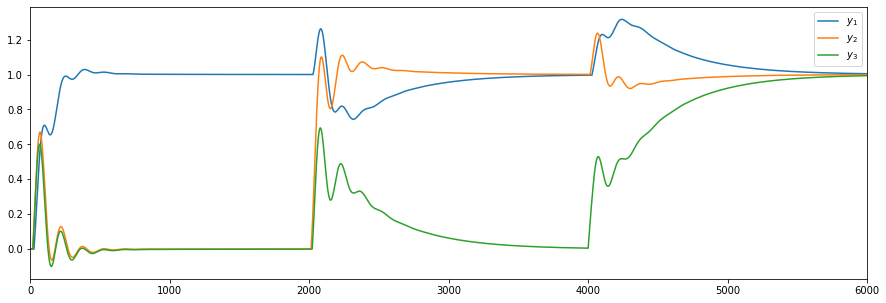

In [53]:
plt.figure(figsize=(15, 5))

plt.plot(ts, ys[:, 0])
plt.plot(ts, ys[:, 1])
plt.plot(ts, ys[:, 2])
plt.xlim(0, ts[-1])
plt.legend([r'$y_1$', r'$y_2$', r'$y_3$'])
plt.savefig("resp.pdf")
plt.show()

In [54]:
# us

In [56]:
GK = sympy.Matrix(K(s))
nums, dens = numpy.zeros(GK.shape).tolist(), numpy.zeros(GK.shape).tolist()
for i in range(GK.shape[0]):
    for j in range(GK.shape[1]):
        gk = GK[i, j]
        n, d = [sympy.Poly(a, s).all_coeffs() for a in gk.as_numer_denom()]
        nums[i][j] = n
        dens[i][j] = d
            
nums = numpy.array(nums)
dens = numpy.array(dens)
delays = numpy.zeros(GK.shape)
nums, dens

(array([[list([0.137514350000000, 0.00534085552620881]), list([0]),
         list([0])],
        [list([0]), list([0.125163830000000, 0.00868948236376719]),
         list([0])],
        [list([0]), list([0]),
         list([0.0290485800000000, 0.00184332082837951])]], dtype=object),
 array([[list([1, 0]), list([1]), list([1])],
        [list([1]), list([1, 0]), list([1])],
        [list([1]), list([1]), list([1, 0])]], dtype=object))

In [57]:
Kl = utils.InternalDelay.from_tf_coefficients(nums, dens, delays)
T = Kl * (I + L)**(-1)

def uf(t):
    if t < 2000:
        return [1, 0, 0]
    elif t < 4000:
        return [1, 1, 0]
    return [1, 1, 1]

ts = numpy.linspace(0, 6000, 6000)
us = T.simulate(uf, ts)

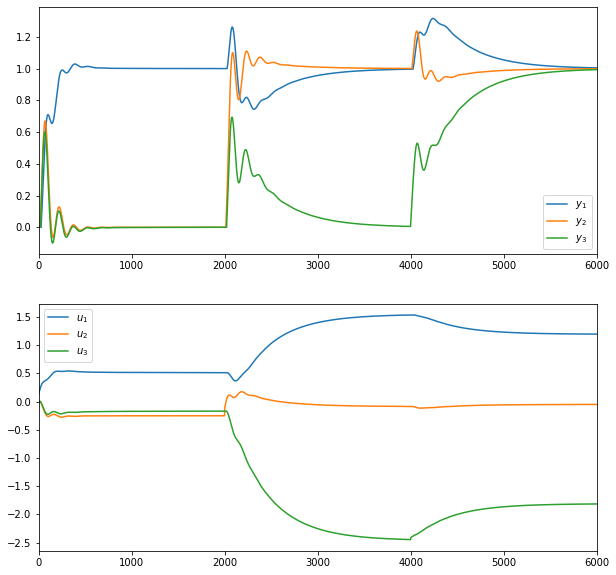

In [61]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(ts, ys[:, 0])
plt.plot(ts, ys[:, 1])
plt.plot(ts, ys[:, 2])
plt.xlim(0, ts[-1])
plt.legend([r'$y_1$', r'$y_2$', r'$y_3$'])

plt.subplot(2, 1, 2)
plt.plot(ts, us[:, 0])
plt.plot(ts, us[:, 1])
plt.plot(ts, us[:, 2])
plt.xlim(0, ts[-1])
plt.legend([r'$u_1$', r'$u_2$', r'$u_3$'])
plt.savefig("resp.pdf")
plt.show()